In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,InputLayer
import random

Using TensorFlow backend.


In [2]:
#Reads the Data
data=pd.read_csv('well_data.csv')

labels=pd.read_csv('well_labels.csv')

In [57]:
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
data.shape

(59400, 40)

In [9]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [11]:
data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [13]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [21]:
data['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [23]:
data['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [25]:
data['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [26]:
data['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [28]:
data['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [31]:
data['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [33]:
data['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [34]:
data['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [35]:
data['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [3]:
#Creates the data frame I need to perform the Neural Network
x_var=data.loc[:,['water_quality','quality_group','quantity','quantity_group','source','source_type',
                  'source_class',
                  'waterpoint_type',
                 'waterpoint_type_group']]


In [4]:
#Counts the number of categorical variables
targets=labels.iloc[:,1]

targets.value_counts()



functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [5]:
#Encodes the target variable to perform calculations
encoded=LabelEncoder()

encoded_targets=encoded.fit_transform(targets)




In [6]:
#Verfies that the Label Enconder Works
np.unique(encoded_targets,return_counts=True)

(array([0, 1, 2]), array([32259,  4317, 22824], dtype=int64))

In [6]:
#Performs label encoder for al of the x variables
x_encoded=[]

for i in x_var:
    encode=encoded.fit_transform(x_var[i])
    x_encoded.append(encode)
    

In [7]:
#transposes the dataframe so that the columns are correct
x_encoded=pd.DataFrame(x_encoded)

x_encoded=x_encoded.transpose()


In [9]:
x_encoded.iloc[:,0].value_counts()

6    50818
4     4856
7     1876
3      804
0      490
5      339
1      200
2       17
Name: 0, dtype: int64

In [11]:
x_encoded.iloc[:,8].value_counts()

1    34625
3    17488
5     6380
4      784
0      116
2        7
Name: 8, dtype: int64

In [8]:
#Lables for the columns
columns=['water_quality','quality_group','quantity','quantity_group','source','source_type',
                  'source_class',
                  'waterpoint_type',
                 'waterpoint_type_group']

#Names the columns in the dataframe
x_encoded.columns=columns

x_encoded.shape

(59400, 9)

In [9]:
#Reshapes the array
encoded_targets=np.reshape(encoded_targets,(59400,1))

encoded_targets.shape

(59400, 1)

In [41]:
x_encoded=np.reshape(x_encoded,(59400,9))

x_encoded=x_encoded.to_numpy()




In [42]:
x_encoded=np.reshape(x_encoded,(59400,9))


In [9]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam,Adagrad,RMSprop,SGD
from sklearn.metrics import confusion_matrix, precision_score, recall_score,accuracy_score
from sklearn.model_selection import train_test_split


In [16]:
#splits the data into training and testing
x_train,X_test,y_train,Y_test=train_test_split(x_encoded,encoded_targets, test_size=.2,random_state=42)

y_train.shape
x_train.shape

(47520, 9)

In [41]:
#Creates the 1st model
model_1=Sequential([
    Dense(18,input_dim=9,activation='relu'),
    Dropout(.2),
    Dense(9,activation='relu'),
    Dropout(.2,),
    Dense(6,activation='relu'),
    Dropout(.2),
    Dense(3, activation='softmax')
    
])

model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
#Fits the model
model_1.fit(x_train,y_train,validation_data=(X_test,Y_test), epochs=100,verbose=0,callbacks=[
    EarlyStopping(monitor='val_accuracy',patience=10)
])

In [45]:
#Prints out model evaluation
evaluation=model_1.evaluate(x_train,y_train)
print('Model Accruracy @ 100 epochs:', round(evaluation[1]*100,1))

47520/47520 [==============================] - 5s 105us/step
Model Accruracy @ 100 epochs: 70.3


In [53]:
#Creates the confusion matrix
predict=model_1.predict_classes(X_test)
cm=confusion_matrix(predict,Y_test)

In [10]:
#Plot feautres of the confusion matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis-1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion Matrix w/o Normalization')
    print(cm)
    #Creates threshold to determine font color and labels each section of confusion matrix with their number 
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j]),
        horizontalaligment='center',
        color='white'if cm[i,j]>thresh else 'black'
    
    
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

 
cm_labels=['Functional','Needs Repairs','Not Functional']

Confusion Matrix w/o Normalization
[[6152  779 2390]
 [   0    0    0]
 [ 305   72 2182]]


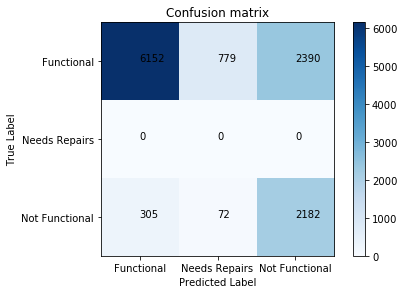

In [62]:
#Prints out confusion matrix. This model does not do a great job of recognizing 'Needs Repairs'
cm_labels=['Functional','Needs Repairs','Not Functional']

plot_confusion_matrix(cm,cm_labels)

In [12]:
#Create a 2nd model with dropout rate
model_2=Sequential([
    Dense(64,input_dim=9,activation='relu'),
    Dropout(.5),
    Dense(32,activation='relu'),
    Dropout(.5,),
    Dense(16, activation='relu'),
    Dropout(.5),
    Dense(6,activation='relu'),
    Dropout(.5),
    Dense(3, activation='softmax')
    
])

model_2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model_2.fit(x_train,y_train,validation_data=(X_test,Y_test), epochs=100,verbose=0,callbacks=[
    EarlyStopping(monitor='val_accuracy',patience=25)
],batch_size=500)

In [15]:
#Model accuracy does not improve with this model
evaluation=model_2.evaluate(x_train,y_train)
print('Model Accruracy @ 100 epochs:', round(evaluation[1]*100,1))

47520/47520 [==============================] - 5s 100us/step
Model Accruracy @ 100 epochs: 69.4


In [12]:
#Attempt to find the best parameters for this problem. First start off by defining my Neural Network
def create_model(n_neurons,n_hidden=1,learning_rate=0.1,input_dim=9,activation='relu'):
    model=Sequential()
    optimizer=Adam(lr=learning_rate)
    model.add(Dense(n_neurons,input_dim=input_dim,activation=activation))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [13]:
#Parameters that I want to test using random grid search to find optimal hyperparameters
params={
    'n_hidden':[1,2,3,4,5],
    'n_neurons': [10,20,30,40,50,60,70,80,90,100],
    'learning_rate':[0.1,0.01,0.001],
    'epochs': [10,20,30,40,50,60,70,80,90,100]
    
}

In [26]:
params

{'n_hidden': [1, 2, 3, 4, 5],
 'n_neurons': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'learning_rate': [0.1, 0.01, 0.001],
 'epochs': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [15]:
#Builds the random search classifier from Keras
random.seed(42)

keras_clf=KerasClassifier(build_fn=create_model)

random_search=RandomizedSearchCV(keras_clf,params,cv=3)

random_search.fit(x_train,y_train,validation_split=.1,verbose=0,
                 callbacks=[EarlyStopping(monitor='val_accuracy',patience=25)])


15840/15840 [==============================] - 2s 111us/step


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001635790AB08>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'epochs': [10, 20, 30, 40, 50, 60, 70,
                                                   80, 90, 100],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'n_hidden': [1, 2, 3, 4, 5],
                                        'n_neurons': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [17]:
#Best parameters according to the Grid Search
random_search.best_params_

{'n_neurons': 70, 'n_hidden': 4, 'learning_rate': 0.001, 'epochs': 90}

In [20]:
#Best accuracy Score
random_search.best_score_

0.7038931051890055

Confusion Matrix w/o Normalization
[[6031    3  423]
 [ 751    8   92]
 [2269    1 2302]]


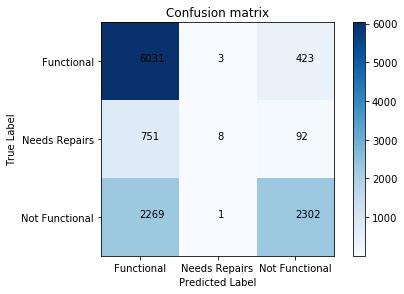

In [29]:
#Creates the confusion matrix
best_model=random_search.best_estimator_.model
best_predicts=best_model.predict_classes(X_test)
best_cm=confusion_matrix(Y_test,best_predicts)
cm_labels=['Functional','Needs Repairs','Not Functional']
plot_confusion_matrix(best_cm,cm_labels)

In [34]:
print('Precision Score for Neural Network is',precision_score(Y_test,best_predicts,average='macro'))
print('Recall Score for Neural Network is:',recall_score(Y_test,best_predicts,average='macro'))
print('Accuracy Score Neural Network is:',accuracy_score(Y_test,best_predicts))

Precision Score for Neural Network is 0.716727758965515
Recall Score for Neural Network is: 0.4823084522194008
Accuracy Score Neural Network is: 0.7021043771043771


In [14]:
#Creates a Nueral Network
def build_model(n_neurons,optimizer,n_hidden=1,learning_rate=0.1,input_dim=9,activation='relu'):
    model=Sequential()
    optimizer=optimizer
    model.add(Dense(n_neurons,input_dim=input_dim,activation=activation))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [19]:
#Parameters for Random Search. This time using different optimiziers
params_optimum={
    'n_hidden':[10,11,12,13,14,15],
    'n_neurons': [64,96,128,160,192,224,256],
    'learning_rate':[0.1,0.01,0.001],
    'epochs': [10,20,30,40,50,60,70,80,90,100],
    'optimizer':['Adam','SGD','Adagrad']
}

In [20]:
params_optimum

{'n_hidden': [10, 11, 12, 13, 14, 15],
 'n_neurons': [64, 96, 128, 160, 192, 224, 256],
 'learning_rate': [0.1, 0.01, 0.001],
 'epochs': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'optimizer': ['Adam', 'SGD', 'Adagrad']}

In [21]:
#Random Grid Search using Kera's Classifier
random.seed(42)

new_keras_clf=KerasClassifier(build_fn=build_model)

new_random_search=RandomizedSearchCV(new_keras_clf,params_optimum,cv=3)

history=new_random_search.fit(x_train,y_train,validation_split=.1,verbose=0,
                 callbacks=[EarlyStopping(monitor='val_accuracy',patience=10)])

15840/15840 [==============================] - 2s 117us/step


In [22]:
#Prints best paramters from model
history.best_params_

{'optimizer': 'SGD',
 'n_neurons': 256,
 'n_hidden': 15,
 'learning_rate': 0.1,
 'epochs': 80}

In [23]:
#Prints best accuracy score
history.best_score_

0.7040614485740662

Confusion Matrix w/o Normalization
[[5986    0  471]
 [ 742    0  109]
 [2206    0 2366]]


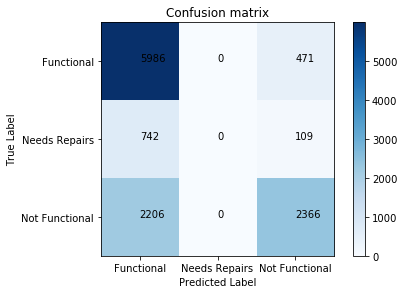

In [24]:
#Prints confusion matrix from the model
sgd_model=history.best_estimator_.model
sgd_predicts=sgd_model.predict_classes(X_test)
sgd_cm=confusion_matrix(Y_test,sgd_predicts)
cm_labels=['Functional','Needs Repairs','Not Functional']
plot_confusion_matrix(sgd_cm,cm_labels)

In [26]:
print('Precision Score for Neural Network is',precision_score(Y_test,sgd_predicts,average='macro'))
print('Recall Score for Neural Network is:',recall_score(Y_test,sgd_predicts,average='macro'))
print('Accuracy Score Neural Network is:',accuracy_score(Y_test,sgd_predicts))

Precision Score for Neural Network is 0.49104916783575897
Recall Score for Neural Network is: 0.48151790702998637
Accuracy Score Neural Network is: 0.703030303030303


Now I want to use Geo location to see if this will help the model. I will perform Kmeans clustering to find out data point's label 

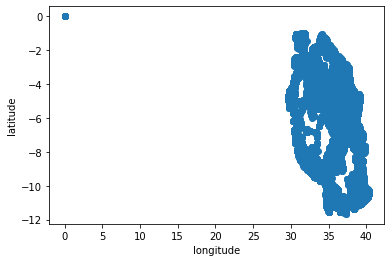

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

#Retrieves Geo Location data
geo_data=data.loc[:,['longitude','latitude']]
#Plots the Geo Location to see if any patterns emerge. Clearly there are outliers
plt.scatter(x=geo_data.iloc[:,0],y=geo_data.iloc[:,1])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()




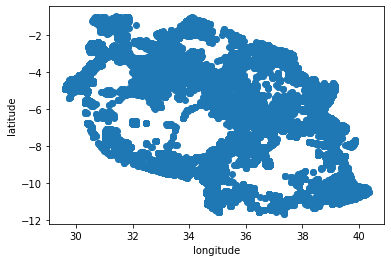

In [13]:
#Filters out Outliers
geo_data=geo_data[(geo_data.longitude>0)]
#PLots results
plt.scatter(x=geo_data.iloc[:,0],y=geo_data.iloc[:,1])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()


In [14]:
#Performs Kmeans with various k centers
sse=[]
k_list=np.arange(1,11)

for i in k_list:
    km=KMeans(n_clusters=i)
    km.fit(geo_data)
    sse.append(km.inertia_)
    

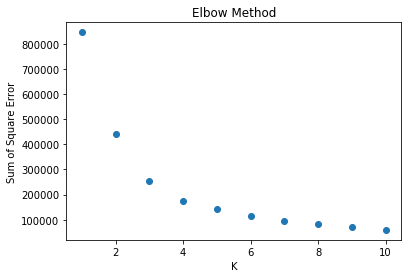

In [15]:
#Plots Elbow Plot to see optimum k centers. That appears to be 4
plt.scatter(x=k_list,y=sse)
plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.title('Elbow Method')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score
#Gets silhouette score
scores=silhouette_score(geo_data,km.labels_)

In [16]:
#Performs Kmeans with 4 clusters
km=KMeans(n_clusters=4)
km.fit(geo_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
#Cluster Centers
km.cluster_centers_

array([[32.32387704, -3.24424906],
       [38.39827044, -8.40351381],
       [34.22884195, -9.17182616],
       [36.82181819, -4.3733311 ]])

In [18]:
#Converts to an array to be able to plot centers
centers=np.array(km.cluster_centers_)

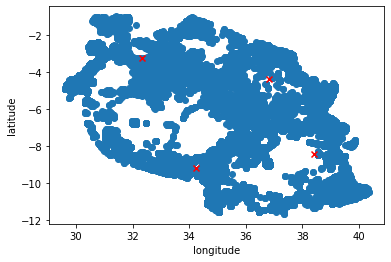

In [19]:
#Plots the centers
plt.scatter(x=geo_data.iloc[:,0],y=geo_data.iloc[:,1])
plt.scatter(centers[:,0],centers[:,1],marker='x',color='r')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [20]:
#Encodes the target variable to perform calculations
encoded=LabelEncoder()
cluster_points=encoded.fit_transform(km.labels_)

In [21]:
#Grabs all relevent data including the GEO Location of the wells
new_x=data.loc[:,['longitude','latitude','water_quality','quality_group','quantity','quantity_group','source','source_type',
                  'source_class',
                  'waterpoint_type',
                 'waterpoint_type_group']]
#Adds Targets to dataframe in order to filter out outliers, so all variables and targets will be the same length
new_x['Targets']=targets
#Filters out Outliers
new_x=new_x[(new_x.longitude>0)]
#Removes longtitude and latitude, will not need them. Instead will use categories assign by KMeans to use as locatio
new_x=new_x.drop(['longitude','latitude'],axis=1)

new_x.shape
#New Target variable with well information
new_targets=new_x.iloc[:,9]
#Encoded Targets
encoded_new_targets=encoded.fit_transform(new_targets)

In [22]:
#Encodes the x variables 
x_new_encoded=[]

for i in x_var:
    encode=encoded.fit_transform(new_x[i])
    x_new_encoded.append(encode)

In [23]:
#transposes the dataframe so that the columns are correct
x_new_encoded=pd.DataFrame(x_new_encoded)

x_new_encoded=x_new_encoded.transpose()

In [24]:
print(len(x_new_encoded))
print(len(cluster_points))
print(len(encoded_new_targets))

57588
57588
57588


In [25]:
#Lables for the columns
columns=['water_quality','quality_group','quantity','quantity_group','source','source_type',
                  'source_class',
                  'waterpoint_type',
                 'waterpoint_type_group']

#Names the columns in the dataframe
x_new_encoded.columns=columns

In [26]:
#Adds 'Geo Location' to the x variables from the cluster labels from the KMeans
x_new_encoded['Geo_Location']=cluster_points

In [27]:
#Verifies value counts from Geo Location
x_new_encoded['Geo_Location'].value_counts()


0    17054
3    16765
2    13690
1    10079
Name: Geo_Location, dtype: int64

In [28]:
#splits the data into training and testing
x_train_geo,X_test_geo,y_train_geo,Y_test_geo=train_test_split(x_new_encoded,encoded_new_targets, test_size=.2,random_state=42)

In [29]:
#Defines Neural Network
def geo_model(n_neurons,optimizer,n_hidden,learning_rate=0.1,input_dim=10,activation='relu'):
    model=Sequential()
    optimizer=optimizer
    model.add(Dense(n_neurons,input_dim=input_dim,activation=activation))
    model.add(Dropout(0.2))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [30]:
#Defines parameters for Neural Network
params_optimum={
    'n_hidden':[2,4,6,8,10],
    'n_neurons': [8,16,32,64,96],
    'learning_rate':[0.1,0.01,0.001],
    'epochs': [10,20,30,40,50,60,70,80,90,100],
    'optimizer':['Adam','SGD','Adagrad'],
    
}

In [31]:
#Random Classifier for Geo Neural Network Model
random.seed(42)

geo_keras_clf=KerasClassifier(build_fn=geo_model)

geo_random_search=RandomizedSearchCV(geo_keras_clf,params_optimum,cv=3)

history_geo=geo_random_search.fit(x_train_geo,y_train_geo,validation_data=(X_test_geo,Y_test_geo),verbose=0,
                 callbacks=[EarlyStopping(monitor='val_accuracy',patience=10)])

15356/15356 [==============================] - 1s 96us/step


In [32]:
#Prints out best parameters
history_geo.best_params_

{'optimizer': 'Adam',
 'n_neurons': 64,
 'n_hidden': 2,
 'learning_rate': 0.1,
 'epochs': 40}

In [34]:
#Prints out best score
history_geo.best_score_

0.7130238016446432

Confusion Matrix w/o Normalization
[[5879   17  405]
 [ 635   54  102]
 [2121   18 2287]]


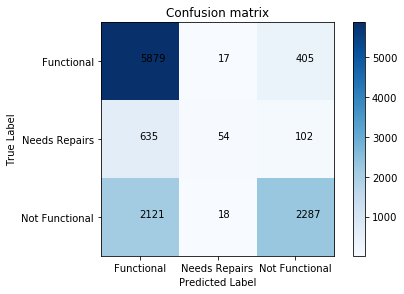

In [37]:
#Prints confusion matrix from the model
geo_best_model=history_geo.best_estimator_.model
geo_best_predicts=geo_best_model.predict_classes(X_test_geo)
geo_best_cm=confusion_matrix(Y_test_geo,geo_best_predicts)
cm_labels=['Functional','Needs Repairs','Not Functional']
plot_confusion_matrix(geo_best_cm,cm_labels)

In [38]:
print('Precision Score for Random Forest is',precision_score(Y_test_geo,geo_best_predicts,average='macro'))
print('Recall Score for Random Forest is:',recall_score(Y_test_geo,geo_best_predicts,average='macro'))
print('Accuracy Socre Random Forest is :', accuracy_score(Y_test_geo,geo_best_predicts))

Precision Score for Random Forest is 0.7020383722959727
Recall Score for Random Forest is: 0.5060046347832842
Accuracy Socre Random Forest is : 0.7136655669387046


Attempt Random Forest Model to see if accuracy improves 

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [35]:
#Attempt to run Random Forest using Geo Location
random.seed(42)

rfc_model=RandomForestClassifier()

n_estimators=[10,20,30,40,50,60,70,80,90,100]
param_grid=dict(n_estimators=n_estimators)

grid=GridSearchCV(rfc_model,param_grid, cv=10, scoring='accuracy') 

#Fit the grid with the data
grid.fit(x_train_geo,y_train_geo)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [36]:
#Mean Scores using cross validation
grid.cv_results_['mean_test_score']

array([0.71751682, 0.71766876, 0.71762535, 0.71788583, 0.71769047,
       0.71788583, 0.71790753, 0.71758194, 0.717799  , 0.71771218])

In [37]:
#Retreieve optimal information to achieve best model
print(grid.best_params_)
print(grid.best_score_)
print (grid.best_estimator_)

{'n_estimators': 70}
0.7179075320164966
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Confusion Matrix w/o Normalization
[[5806   32  463]
 [ 613   62  116]
 [2042   23 2361]]


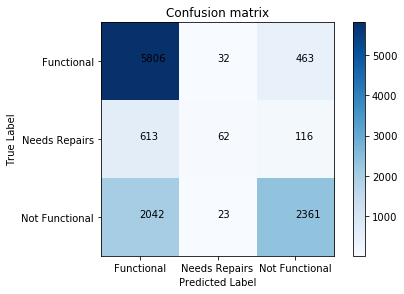

In [41]:
#Creates the model with the best hyperparamter 
final_model=grid.best_estimator_
#Predicts the model
final_prediction=final_model.predict(X_test_geo)
#Creates the confusion matrix
forest_cm=confusion_matrix(Y_test_geo,final_prediction)
#Plots the confusion matrix
plot_confusion_matrix(forest_cm, cm_labels)

In [43]:
print('Precision Score for Random Forest is',precision_score(Y_test_geo,final_prediction,average='macro'))
print('Recall Score for Random Forest is:',recall_score(Y_test_geo,final_prediction,average='macro'))
print('Accuracy Socre Random Forest is :', accuracy_score(Y_test_geo,final_prediction))

Precision Score for Random Forest is 0.6730610195018318
Recall Score for Random Forest is: 0.5110872023999243
Accuracy Socre Random Forest is : 0.7144469525959368


In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#Using ADAboost to see if accuracy improves
ada_model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm='SAMME.R')

ada_params={
    'n_estimators':[100,200,300,400,500],
    'learning_rate':[0.1,0.01,0.001]
}

ada_grid=GridSearchCV(ada_model,ada_params, cv=10, scoring='accuracy')

ada_grid.fit(x_train_geo,y_train_geo)


GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=1,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
   

In [31]:
#Prints mean cross-validation scores
ada_grid.cv_results_['mean_test_score']

array([0.6985891 , 0.70514435, 0.70371174, 0.7039288 , 0.70520946,
       0.69448665, 0.69448665, 0.69448665, 0.69448665, 0.69448665,
       0.64317343, 0.64317343, 0.64317343, 0.66203603, 0.69448665])

In [32]:
print(ada_grid.best_params_)
print(ada_grid.best_score_)
print (ada_grid.best_estimator_)

{'learning_rate': 0.1, 'n_estimators': 500}
0.7052094638593445
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                          

Confusion Matrix w/o Normalization
[[5950    0  351]
 [ 696    0   95]
 [2301    0 2125]]


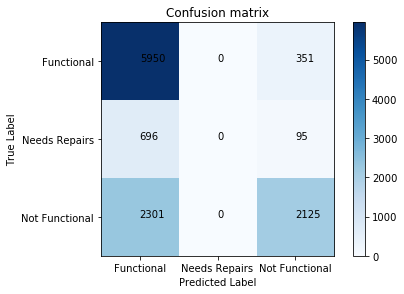

In [33]:
#Creates the model with the best hyperparamter 
final_model=ada_grid.best_estimator_
#Predicts the model
ada_prediction=final_model.predict(X_test_geo)
#Creates the confusion matrix
forest_cm=confusion_matrix(Y_test_geo,ada_prediction)
#Plots the confusion matrix
plot_confusion_matrix(forest_cm, cm_labels)

In [34]:
print('Precision Score for Random Forest is',precision_score(Y_test_geo,ada_prediction,average='macro'))
print('Recall Score for Random Forest is:',recall_score(Y_test_geo,ada_prediction,average='macro'))
print('Accuracy Socre Random Forest is :', accuracy_score(Y_test_geo,ada_prediction))

Precision Score for Random Forest is 0.49718467560331336
Recall Score for Random Forest is: 0.4748040146643486
Accuracy Socre Random Forest is : 0.7010765757944087


C:\Users\John\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


attempt to use one hot encoding on target variables. Perhaps this will increase accuracy

In [39]:
#One hot encode the target variable. Last attempt tot imporve accuracy
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
one_hot=ohe.fit_transform(new_x[['Targets']])

In [40]:
#One hot categories
ohe.categories_

[array(['functional', 'functional needs repair', 'non functional'],
       dtype=object)]

In [41]:
#splits the data into training and testing
x_train_one,X_test_one,y_train_one,Y_test_one=train_test_split(x_new_encoded,one_hot, test_size=.2,random_state=42)

In [44]:
#Random Forest Classifier using one hot encoder
random.seed(42)

one_hot_model=RandomForestClassifier()

n_estimators=[10,20,30,40,50,60,70,80,90,100]
param_grid=dict(n_estimators=n_estimators)

ohe_grid=GridSearchCV(one_hot_model,param_grid, cv=10, scoring='accuracy') 

#Fit the grid with the data
ohe_grid.fit(x_train_one,y_train_one)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [45]:
#Mean Cross validation Scores
ohe_grid.cv_results_['mean_test_score']

array([0.69798133, 0.69884958, 0.69884958, 0.69863252, 0.69897981,
       0.69937052, 0.70013024, 0.70091166, 0.70078142, 0.7007163 ])

In [46]:
print(ohe_grid.best_params_)
print(ohe_grid.best_score_)
print (ohe_grid.best_estimator_)

{'n_estimators': 80}
0.7009116561753853
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Confusion Matrix w/o Normalization
[[5902   26  373]
 [ 643   60   88]
 [2145   22 2259]]


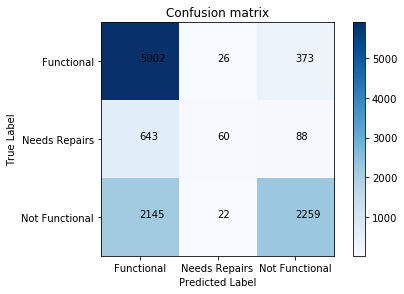

In [64]:
#Creates the model with the best hyperparamter 
ohe_final_model=ohe_grid.best_estimator_
#Predicts the model
ohe_prediction=ohe_final_model.predict(X_test_one)
#Creates the confusion matrix
ohe_cm=confusion_matrix(Y_test_one.argmax(axis=1),ohe_prediction.argmax(axis=1))
#Plots the confusion matrix
plot_confusion_matrix(ohe_cm, cm_labels)

In [57]:
print('Precision Score for Random Forest is',precision_score(Y_test_one,ohe_prediction,average='macro'))
print('Recall Score for Random Forest is:',recall_score(Y_test_one,ohe_prediction,average='macro'))
print('Accuracy Socre Random Forest is :', accuracy_score(Y_test_one,ohe_prediction))

Precision Score for Random Forest is 0.692085631998468
Recall Score for Random Forest is: 0.49864778506582713
Accuracy Socre Random Forest is : 0.6989928807084563
